# WeatherPy

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Generate Cities List


In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count 
len(cities)

620

# Perform API Calls

In [4]:
# Create a base url
base_url = "http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=" + api_key

# Counters
city_counter = 1
set_counter = 1

# Create the lists to hold relative data
cities_list= []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

print("Started")

# Create a query url for each city in the cities list to get json response
for i, city in enumerate(cities):
    
    # Group cities as sets of 50s
    if (i % 50 == 0 and i >= 50):
        set_counter += 1
        city_counter = 1
         
    # Create API url for each city
    query_url = base_url +"&q=" + city
    
    # Get json respose for each city
    response = requests.get(query_url).json()
    
    # Print the results 
    print(f"Processing Record {city_counter} of Set {set_counter} | {city}")
    
    # Increase city counter
    city_counter += 1
    
   # Add the values to the lists
    try:       
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        wind_speed.append(response["wind"]["speed"])
        cities_list.append(response["name"])
    except:
        print("City not found. Skipping...")
        pass
        
print("Completed")


Started
Processing Record 1 of Set 1 | ituni
City not found. Skipping...
Processing Record 2 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 3 of Set 1 | aflu
City not found. Skipping...
Processing Record 4 of Set 1 | atuona
Processing Record 5 of Set 1 | busselton
Processing Record 6 of Set 1 | pevek
Processing Record 7 of Set 1 | bambous virieux
Processing Record 8 of Set 1 | georgetown
Processing Record 9 of Set 1 | mandalgovi
Processing Record 10 of Set 1 | hobart
Processing Record 11 of Set 1 | chipata
Processing Record 12 of Set 1 | dong hoi
Processing Record 13 of Set 1 | burica
City not found. Skipping...
Processing Record 14 of Set 1 | upernavik
Processing Record 15 of Set 1 | tasiilaq
Processing Record 16 of Set 1 | nikolskoye
Processing Record 17 of Set 1 | sao joao da barra
Processing Record 18 of Set 1 | kulhudhuffushi
Processing Record 19 of Set 1 | angra
City not found. Skipping...
Processing Record 20 of Set 1 | dikson
Processing Record 21 of Set 

# Convert Raw Data to DataFrame

 ## Export the city data into a .csv.
 ## Display the DataFrame

In [5]:
# Create a dictionary to keep data 
weather_data = {
     "City": cities_list,
     "Cloudiness": cloudiness,
     "Country": country,
     "Date": date,
     "Humidity": humidity,
     "Lat": lat,
     "Lng": lng,
     "Max Temp": max_temp,
     "Wind Speed": wind_speed    
 }

# Create the data frame and count variables for each columns
weather_df = pd.DataFrame(weather_data)
weather_df.count()

City          552
Cloudiness    552
Country       552
Date          552
Humidity      552
Lat           552
Lng           552
Max Temp      552
Wind Speed    552
dtype: int64

In [6]:
# Display the data frame
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Atuona,91,PF,1578327472,73,-9.80,-139.03,79.66,14.81
1,Busselton,0,AU,1578327475,25,-33.64,115.35,68.00,12.37
2,Pevek,0,RU,1578327686,79,69.70,170.27,-8.97,4.88
3,Bambous Virieux,75,MU,1578327561,88,-20.34,57.76,80.60,2.24
4,Georgetown,20,GY,1578327650,66,6.80,-58.16,87.80,9.17


# Plotting the Data

. Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.


Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

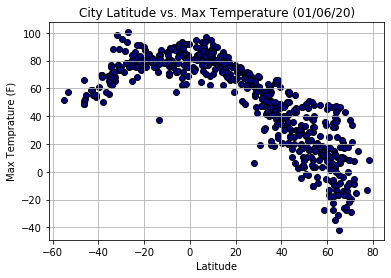

In [7]:
# Create a scatter plot for latitude and temprature
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], marker = "o", facecolor = "navy", edgecolor="black")
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Max Temprature (F)")
plt.grid()
plt.savefig("Figures/temperature.png")
plt.show()

## Latitude vs. Humidity Plot

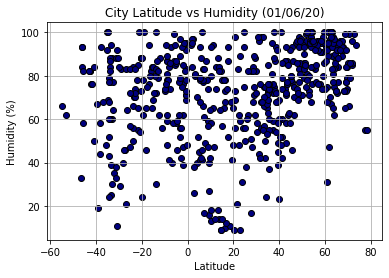

In [8]:
# Create a scatter plot for latitude and humidity
plt.scatter(weather_df["Lat"], weather_df["Humidity"], marker = "o", facecolor = "navy", edgecolor="black")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs Humidity (%s)" % time.strftime("%x"))
plt.grid()
plt.savefig("Figures/humidity.png")
plt.show()

## Latitude vs. Cloudiness Plot

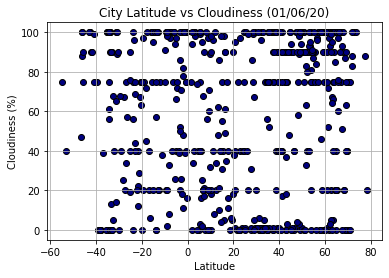

In [9]:
# Create a scatter plot for latitude and cloudiness
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], marker = "o", facecolor = "navy", edgecolor="black")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs Cloudiness (%s)" % time.strftime("%x"))
plt.grid()
plt.savefig("Figures/cloudiness.png")
plt.show()

## Latitude vs. Wind Speed Plot

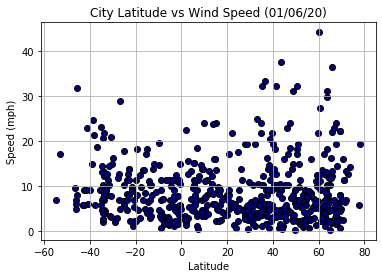

In [10]:
# Create a scatter plot for latitude and wind speed
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], marker = "o", facecolor = "navy", edgecolor="black")
plt.xlabel("Latitude")
plt.ylabel("Speed (mph)")
plt.title("City Latitude vs Wind Speed (%s)" % time.strftime("%x"))
plt.grid()
plt.savefig("Figures/wind_speed.png")
plt.show()

In [11]:
# save the dataframe as csv file
weather_df.to_csv("output_data_file", index=False, header=True)


## WeatherPy Analysis


For this project, to create a representative model of weather across world cities, we are trying to see if there is any trend between location and temperature, wind speed, cloudiness, and humidity as we get closer to the equator. Using randomly selected 500+ unique cities around the world based on latitude and longitude information, created plots to visualize the relations. We needed to use wide range of cities to get relaible data.

. Looking at the latitude and maximum temprature plot we can say as cities get closer to the equator, tempratures tend to get higher. So we can conclude that, there is a trend between latitude and temprature as we get closer to the equator.

. For humidity, the plot doesn't show any relation between latitude and humidity. Humidity doesn't get higher or lower as we get closer to the equator. Different latitudes can have similar humidity rates, or similar latidues can have different humidity rates.

. For cloudiness, again we can't point any relation between latitude and cloudiness as we get closer to the equator. Cities that are closer to the equator don't show any trend like they have any similarity for cloudiness.

. For wind speed, the plot shows cities that have very diffirent latitudes can have similar wind speeds, and similar latitudes doesn't necessarily have the similar wind speeds. So we can say latitude and wind speed doesn't create a trend.